In [2]:
"""
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 -V || python -V

Python 3.11.4


In [1]:
from _requirements import *

## Simulation: Numerical validation of Proposition 1 

In [3]:
## Parameters #####

# Reference shape
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
n = p_star.shape[0]

## Generate the simulation frames #####
tf = 2
h = 5

args = {
    "Z"     : ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1)), 
    "p_star": p_star,
    "p0"    : [[-9,-3], [-5,-5], [0,4], [0,-5]],
    "tf"    : tf, 
    "h"     : h,
    "kappa" : 1, 
}

sim_fr = AffineComplexSimulator(**args)
sim_fr.check_W_L(eigenvectors=False)

## Design the parameters of a body-fixed desired velocity in S #####
params = [1, 0, 0, 0, 0, 0, 0]
check_case(sim_fr, params, debug=True)

Failed to dualize the problem: 'float' object is not iterable
W (6, 6) = 
 [[ 0.25  0.    0.    0.    0.    0.  ]
 [ 0.   -0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.25  0.    0.    0.  ]
 [ 0.    0.    0.   -0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.25]]
L (4, 4) = 
 [[ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]
 [ 0.25 -0.25  0.25 -0.25]
 [-0.25  0.25 -0.25  0.25]]
 --- Eigenvalues
lambda_0 = -0.000000+0.000000j
lambda_1 = -1.000000+0.000000j
lambda_2 = -0.000000+0.000000j
lambda_3 = -0.000000+0.000000j
------------- -> C5 (hxw == 0 and hyw == 0 and vx != 0)
l+ = 0j  | l- = 0j
Av* =
 [[0 1 0]
 [0 0 0]
 [0 0 0]]
ax*ay - hxw*hyw = 0
------------- 


In [6]:
## Design M #####

# mu_ij weights for the given p_star and Z --------------------------------------------
def get_mu_matrix(params):
    mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    mu_matrix_ax = np.array([[0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_ay = np.array([[0,1,0,0], [1,0,0,0], [0,0,0,1], [0,0,1,0]])/2
    mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
    mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
    mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    vx, vy, ax, ay, omega, hx, hy = params

    M = vx*mu_matrix_x + vy*mu_matrix_y + ax*mu_matrix_ax + ay*mu_matrix_ay
    M += omega*mu_matrix_w + hx*mu_matrix_hx + hy*mu_matrix_hy
    return M
# -------------------------------------------------------------------------------------

# Pass the weights to the simulation frame, it will compute M and L_mod
sim_fr.set_manual_mu(get_mu_matrix(params))

## Calculate the lower bound of h (h_l) #####
sim_fr.check_MBT(eigenvectors=False)
hl = sim_fr.kappa * 1 # maximum eigenvalue (from previous print)
print(f"\n{hl=}\n")

## Launch the simulation #####
sim_fr.numerical_simulation()


 -> (M @ B.T).H @ (M @ B.T)
 --- Eigenvalues
lambda_0 = 1.000000
lambda_1 = 0.000000
lambda_2 = 1.000000
lambda_3 = 0.000000

hl=1



Executing numerical simulation: 100%|██████████| 2000/2000 [00:00<00:00, 32911.34it/s]


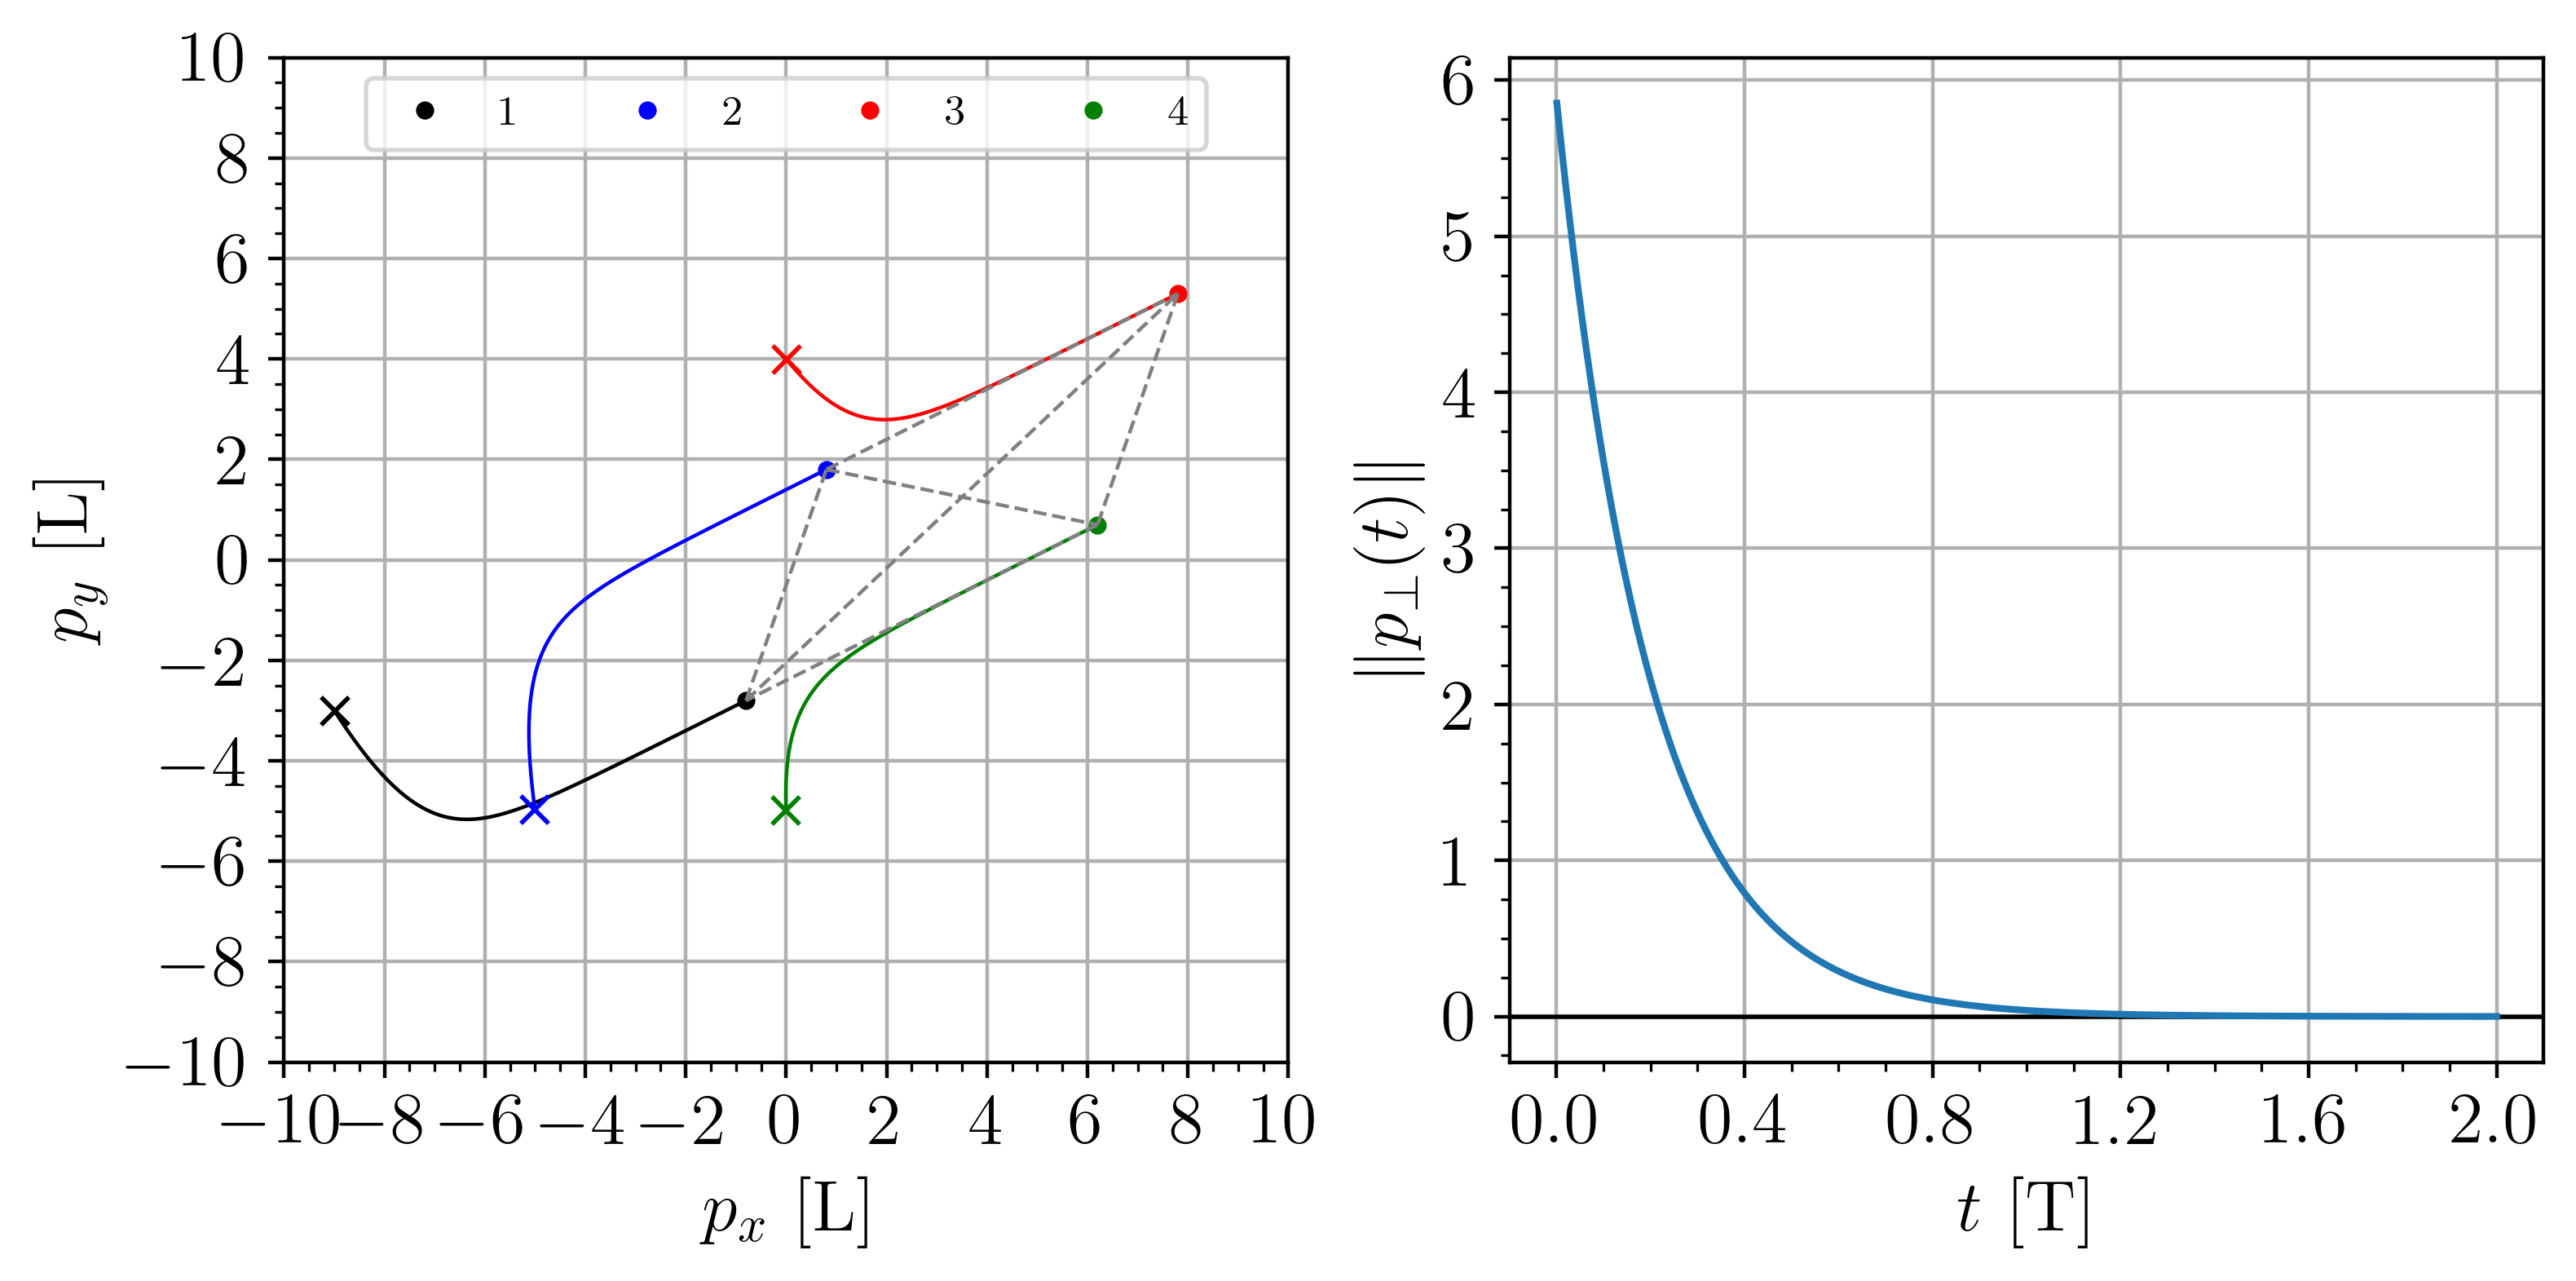

In [8]:
## Generate the paper plot ####

# Init figure and config axes
fig = plt.figure(figsize=(9,4), dpi=400)
ax1, ax2 = fig.subplots(1,2)

config_data_axis(ax1, 2, 2, y_right=False)
config_data_axis(ax2, 0.4, 1, y_right=False)

lim = 10
ax1.set_xlim([-lim, lim])
ax1.set_ylim([-lim, lim])
ax1.grid(True)
ax1.set_aspect("equal")
ax1.set_xlabel(r"$p_x$ [L]")
ax1.set_ylabel(r"$p_y$  [L]")

ax2.grid(True)
ax1.set_aspect("equal")
ax2.set_xlabel(r"$t$ [T]")
ax2.set_ylabel(r"$\|p_\perp(t)\|$")

# Axis: X-Y
sim_fr.plot(ax1)
ax1.legend(ncols=4, fontsize="xx-small", loc="upper center")

# Axis: ||p_perp||
ax2.axhline(0, c="k", lw=1)
ax2.plot(sim_fr.data["t"], sim_fr.data["p_perp_norm"])

plt.show()


## Simulation: Numerical validation of Proposition 2

In [2]:
## Generate the simulation frame #####

# Reference shape
p_star = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square
p_0 = np.array([[-1,-1], [-1,1], [1,1], [1,-1]]) # square

args = {
    "Z"     : ((1,2), (1,3), (2,3), (2,4), (3,4), (4,1)),
    "p_star": p_star,
    "p0"    : p_0, # temp
    "tf"    : 4, 
    "h"     : 1,
    "kappa" : 1, #tmp
}

sim_fr = AffineComplexSimulator(**args)

Failed to dualize the problem: 'float' object is not iterable


In [24]:
## Design parameters for the body-fixed desired velocity in S #####

# mu_ij weights for the given p_star and Z --------------------------------------------
def get_mu_matrix(params):
    mu_matrix_x = np.array([[0,0,0,-1], [0,0,-1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_y = np.array([[0,-1,0,0], [1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    mu_matrix_ax = np.array([[0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]])/2
    mu_matrix_ay = np.array([[0,1,0,0], [1,0,0,0], [0,0,0,1], [0,0,1,0]])/2
    mu_matrix_w = np.array([[0,1,0,-1], [-1,0,1,0], [0,-1,0,1], [1,0,-1,0]])/2
    mu_matrix_hx = np.array([[0,0,0,1], [0,0,-1,0], [0,1,0,0], [-1,0,0,0]])/2
    mu_matrix_hy = np.array([[0,1,0,0], [-1,0,0,0], [0,0,0,1], [0,0,-1,0]])/2

    vx, vy, ax, ay, omega, hx, hy = params

    M = vx*mu_matrix_x + vy*mu_matrix_y + ax*mu_matrix_ax + ay*mu_matrix_ay
    M += omega*mu_matrix_w + hx*mu_matrix_hx + hy*mu_matrix_hy
    return M
# -------------------------------------------------------------------------------------

# Parameters examples -----------------------------------------------------------------
# C1
params_c1a = [2, 0, 0.5, 0, 1, 0.1, 1]
params_c1b = [1, 0, 1, 1, 0, 0, 0]

# C2
params_c2a = [0, 0, 1, 1, 0, 0, 0.5]
params_c2b = [0, 0, 1, 1, 0, 0.5, 0]

# C3
params_c3 = [2, 2, 0.5, 1, 0, 1, 0.5]

# C4
params_c4 = [10, 0, 1, 4, 0, 4, 1]

# C5
params_c5a = [0, 2, 0, 0, 0, 0, 1]
params_c5b = [1, 0, 0, 0, 0, 1, 0]
params_c5c = [1, 0, 0, 0, 0, 0, 0]
params_c5d = [0, 1, 0, 0, 0, 0, 0]

# C6

params_c6a = [0, 1, 0, 0, 0, 1, 0]
params_c6b = [1, 0, 0, 0, 0, 0, 2]
# -------------------------------------------------------------------------------------

params_c1 = params_c1a
params_c2 = params_c2a
params_c3 = params_c3
params_c4 = params_c4
params_c5 = params_c5d
params_c6 = params_c6a

check_case(sim_fr, params_c1a, debug=True)
check_case(sim_fr, params_c1b, debug=True)
check_case(sim_fr, params_c2a, debug=True)
check_case(sim_fr, params_c2b, debug=True)
check_case(sim_fr, params_c3, debug=True)
check_case(sim_fr, params_c4, debug=True)
check_case(sim_fr, params_c5a, debug=True)
check_case(sim_fr, params_c5b, debug=True)
check_case(sim_fr, params_c5c, debug=True)
check_case(sim_fr, params_c5d, debug=True)
check_case(sim_fr, params_c6a, debug=True)
check_case(sim_fr, params_c6b, debug=True)


------------- -> C1
l+ = (0.25+1.3181426326464067j)  | l- = (0.25-1.3181426326464067j)
Av* =
 [[ 0.   2.   0. ]
 [ 0.   0.5  2. ]
 [ 0.  -0.9  0. ]]
ax*ay - hxw*hyw = 1.8
------------- 
------------- -> C1 (l1 == l2 and ax == ay and hxw == 0 and hyw == 0)
l+ = (1+0j)  | l- = (1+0j)
Av* =
 [[0 1 0]
 [0 1 0]
 [0 0 1]]
ax*ay - hxw*hyw = 1
------------- 
------------- -> C2 (hxw == 0)
l+ = (1+0j)  | l- = (1+0j)
Av* =
 [[0.  0.  0. ]
 [0.  1.  0.5]
 [0.  0.  1. ]]
ax*ay - hxw*hyw = 1.0
------------- 
------------- -> C2 (hyw == 0)
l+ = (1+0j)  | l- = (1+0j)
Av* =
 [[0.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.5 1. ]]
ax*ay - hxw*hyw = 1.0
------------- 
------------- -> C3
l+ = (1.5+0j)  | l- = 0j
Av* =
 [[0.  2.  2. ]
 [0.  0.5 0.5]
 [0.  1.  1. ]]
ax*ay - hxw*hyw = 0.0
------------- 
------------- -> C4
l+ = (5+0j)  | l- = 0j
Av* =
 [[ 0 10  0]
 [ 0  1  1]
 [ 0  4  4]]
ax*ay - hxw*hyw = 0
------------- 
------------- -> C5 (hxw == 0 and vx == 0)
l+ = 0j  | l- = 0j
Av* =
 [[0 0 2]
 [0 0 1]
 [0 0 0

In [25]:
## Execute the simulations and extract the plot data #####

def plot_case(params, alphas_list, ax, kappa):
    sim_fr.kappa = kappa
    
    # Calculate the initial condition for the given alphas
    pt = get_pt_parallel(sim_fr, params, alphas_list)
    p0 = pt(0)
    sim_fr.x0 = p0

    # Set the matrix M and kappa
    sim_fr.set_manual_mu(get_mu_matrix(params))
    
    # Launch the numerical simulation and plot
    sim_fr.numerical_simulation()
    sim_fr.plot(ax, alpha1=0.5, alpha2=1)

    # Plot the analytical solution
    t_list = np.linspace(0, sim_fr.tf, 100)
    pt_eval = np.zeros((len(t_list), sim_fr.n), dtype=complex)

    for i,t in enumerate(t_list):
        pt_eval[i,:] = pt(t)

    for i in range(sim_fr.n):
        ax.plot(
            np.real(pt_eval[:,i]), 
            np.imag(pt_eval[:,i]), 
            c=COLORS[i], ls="--", lw=1, dashes=(3, 5)
        )
    
    print(f"{sim_fr.x0=}")
    print(f"{params=}, {alphas_list=}, {kappa=} \n")
    
kappa1, kappa2, kappa3, kappa4, kappa5, kappa6 = 0.8, 0.3, 0.3, 0.04, 1, 1

alphas1 = [2,0.5,1j]
alphas2 = [1+1j,3+5j,0.8]
alphas3 = [-5-5j,1j,1+0.25j]
alphas4 = [-5-5j,2j,1+1j]
alphas5 = [-4-4j,0.2+2j,4]
alphas6 = [-4-4j,5+0j,-1+1j]

Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 88599.58it/s]


sim_fr.x0=array([-2.84457071-3.31811869j, -0.45828544-2.49997605j,
        1.54171456+1.50002395j, -0.84457071+0.68188131j])
params=[2, 0, 0.5, 0, 1, 0.1, 1], alphas_list=[2, 0.5, 1j], kappa=0.8 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 81617.52it/s]


sim_fr.x0=array([-2.3-0.5j,  0.9-0.5j,  4.3+2.5j,  1.1+2.5j])
params=[0, 0, 1, 1, 0, 0, 0.5], alphas_list=[(1+1j), (3+5j), 0.8], kappa=0.3 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 92574.68it/s]


sim_fr.x0=array([-4.5-4.875j, -2.5-8.375j, -1.5-4.125j, -3.5-0.625j])
params=[2, 2, 0.5, 1, 0, 1, 0.5], alphas_list=[(-5-5j), 1j, (1+0.25j)], kappa=0.3 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 92469.06it/s]


sim_fr.x0=array([-5.-5.j,  3.-1.j,  5.+5.j, -3.+1.j])
params=[10, 0, 1, 4, 0, 4, 1], alphas_list=[(-5-5j), 2j, (1+1j)], kappa=0.04 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 97759.64it/s]


sim_fr.x0=array([-8.4-8.j, -8. -4.j,  0.4+0.j,  0. -4.j])
params=[0, 1, 0, 0, 0, 0, 0], alphas_list=[(-4-4j), (0.2+2j), 4], kappa=1 



Executing numerical simulation: 100%|██████████| 4000/4000 [00:00<00:00, 56999.83it/s]


sim_fr.x0=array([ -8.-5.j,   2.-5.j,   0.-3.j, -10.-3.j])
params=[0, 1, 0, 0, 0, 1, 0], alphas_list=[(-4-4j), (5+0j), (-1+1j)], kappa=1 



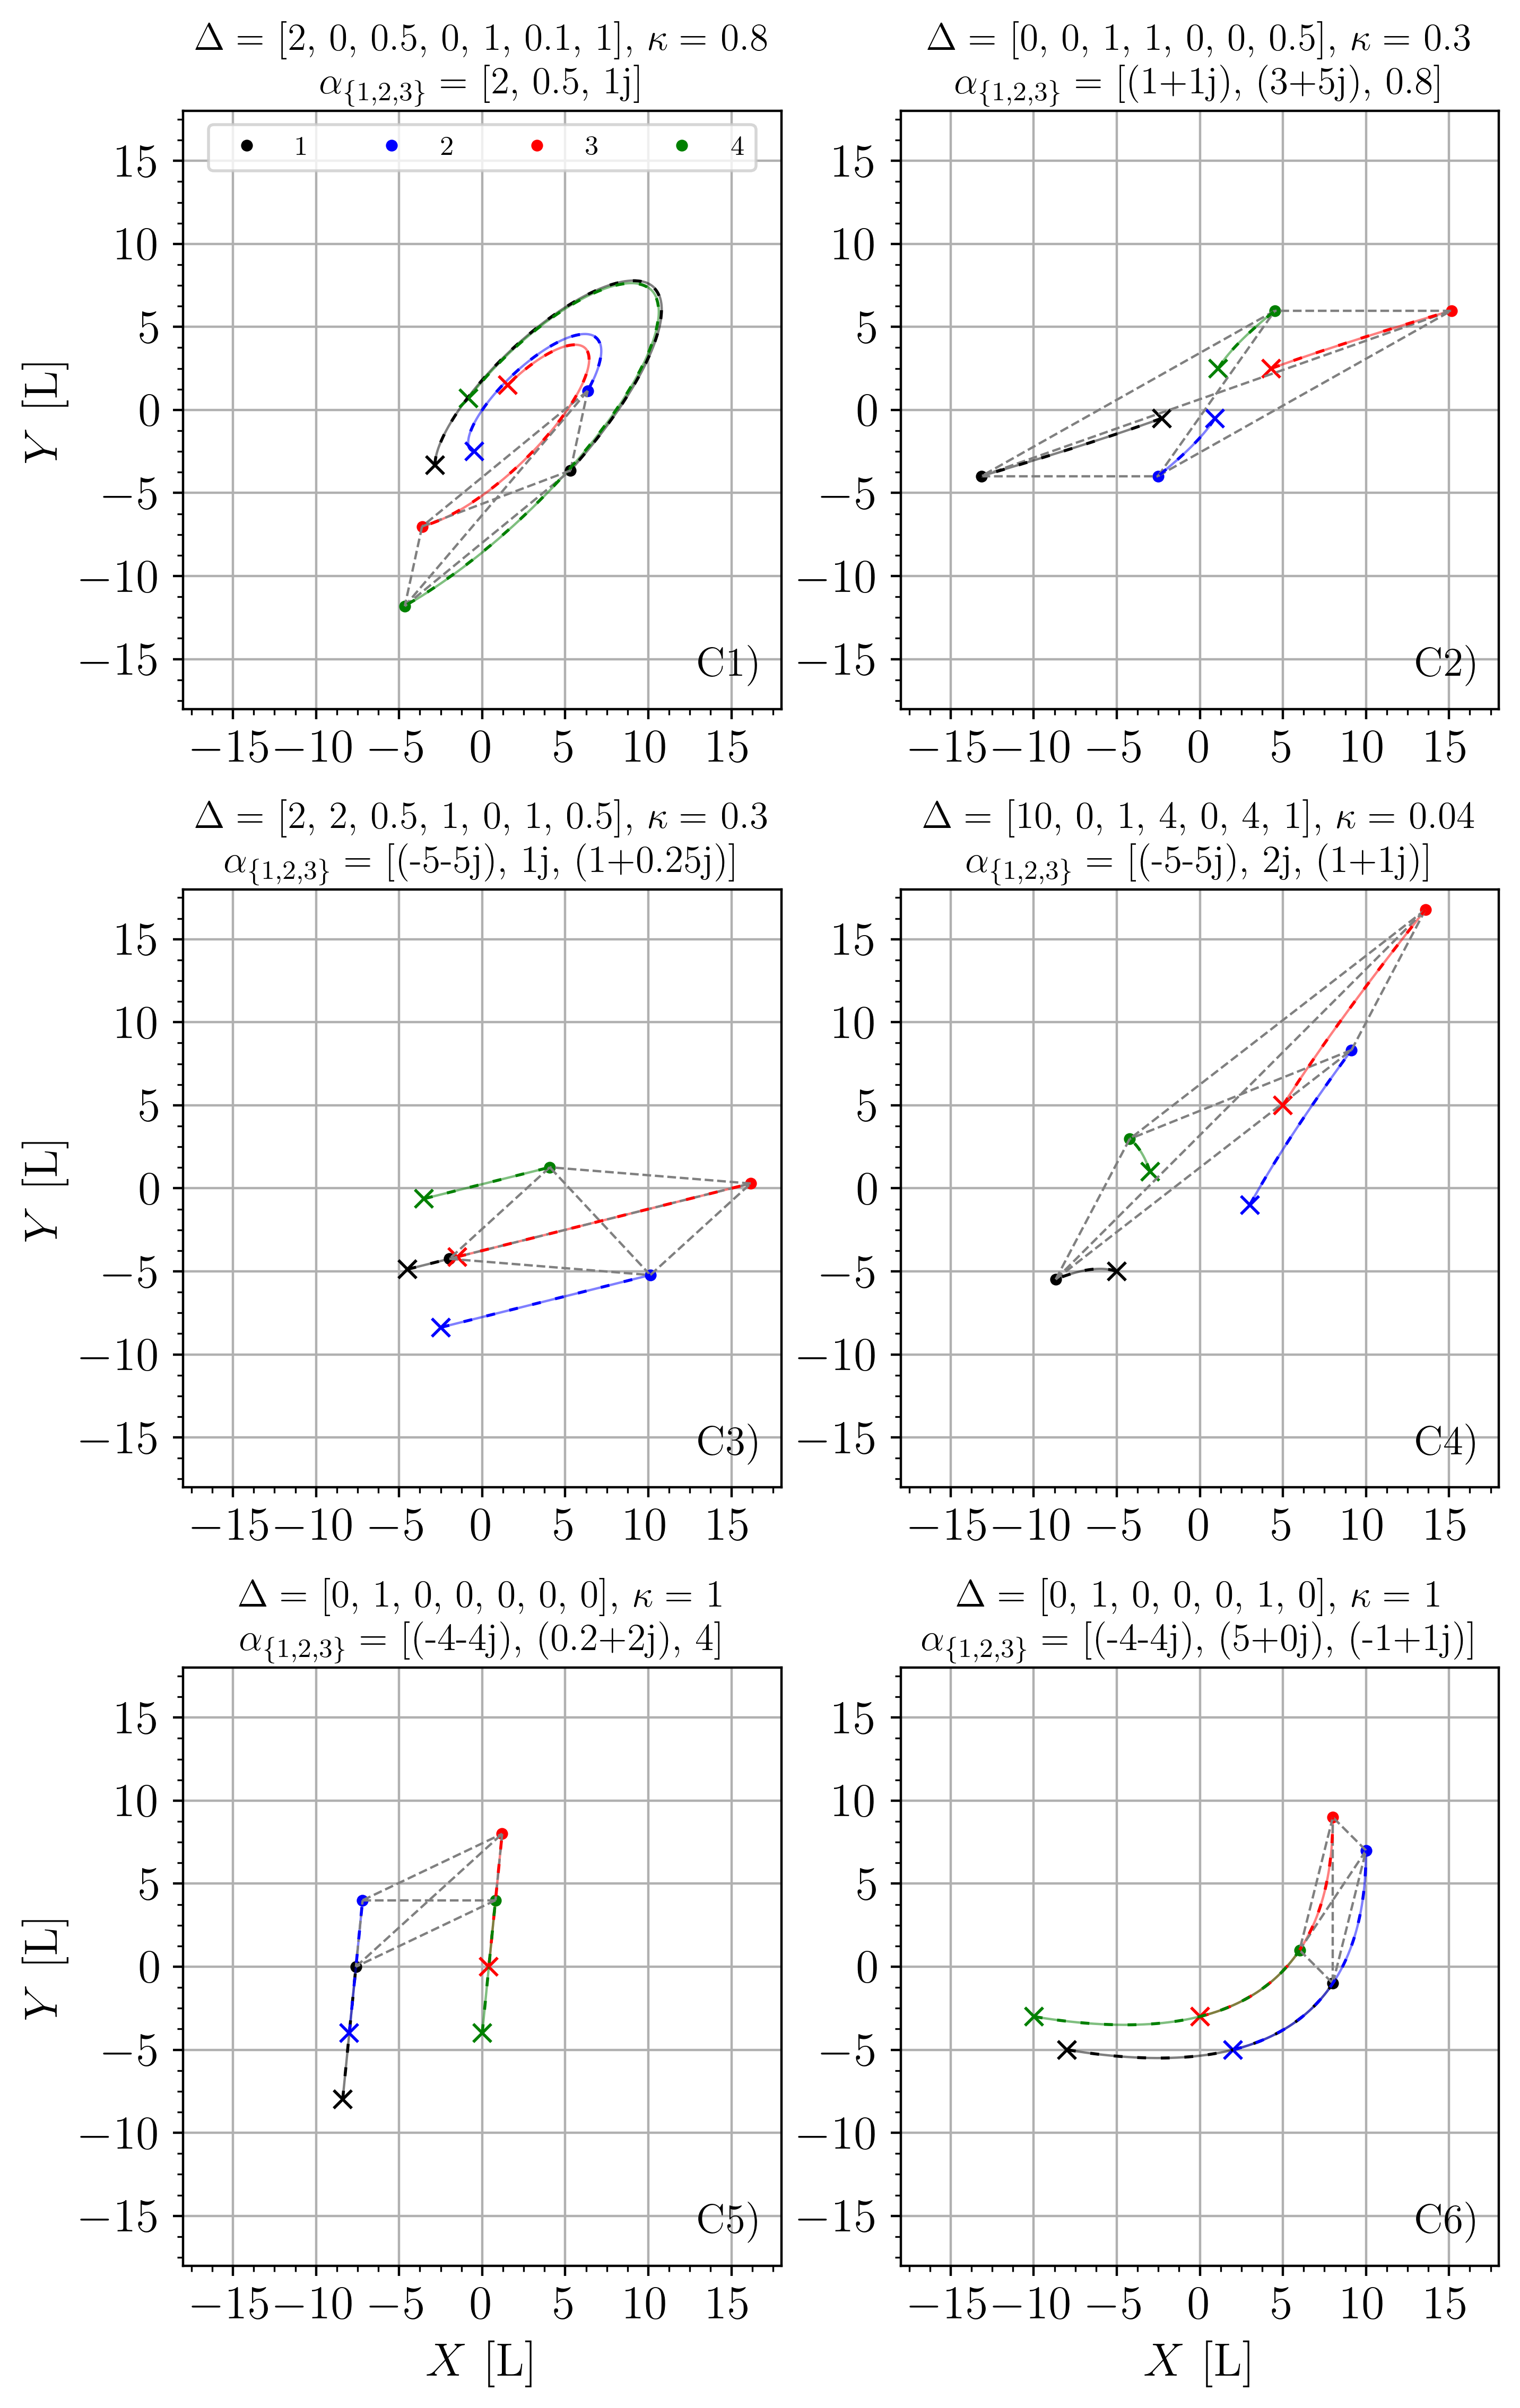

In [26]:
# Generate and configure the plot -----------------------------------------------------
fig = plt.figure(figsize=(8,13.5), dpi=400)
axes = fig.subplots(3,2)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

lim = 18
for ax in axes.flatten():
    config_data_axis(ax, 5, 5, y_right=False, xlims=[-lim,lim], ylims=[-lim,lim])
    ax.set_aspect("equal")

ax1.set_ylabel(r"$Y$ [L]")
ax3.set_ylabel(r"$Y$ [L]")
ax5.set_ylabel(r"$Y$ [L]")
ax5.set_xlabel(r"$X$ [L]")
ax6.set_xlabel(r"$X$ [L]")

ax1.text(13, -16, "C1)", fontdict={"size":14}, weight="bold")
ax2.text(13, -16, "C2)", fontdict={"size":14}, weight="bold")
ax3.text(13, -16, "C3)", fontdict={"size":14}, weight="bold")
ax4.text(13, -16, "C4)", fontdict={"size":14}, weight="bold")
ax5.text(13, -16, "C5)", fontdict={"size":14}, weight="bold")
ax6.text(13, -16, "C6)", fontdict={"size":14}, weight="bold")

title1 = r"$\Delta =$ " + str(params_c1) + r", $\kappa =$ " + str(kappa1) + "\n"
title1 = title1 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas1)
title2 = r"$\Delta =$ " + str(params_c2) + r", $\kappa =$ " + str(kappa2) + "\n"
title2 = title2 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas2)
title3 = r"$\Delta =$ " + str(params_c3) + r", $\kappa =$ " + str(kappa3) + "\n"
title3 = title3 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas3)
title4 = r"$\Delta =$ " + str(params_c4) + r", $\kappa =$ " + str(kappa4) + "\n"
title4 = title4 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas4)
title5 = r"$\Delta =$ " + str(params_c5) + r", $\kappa =$ " + str(kappa5) + "\n"
title5 = title5 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas5)
title6 = r"$\Delta =$ " + str(params_c6) + r", $\kappa =$ " + str(kappa6) + "\n"
title6 = title6 + r"$\alpha_{\{1,2,3\}} =$ " + str(alphas6)

ax1.set_title(title1, fontdict={"size":13})
ax2.set_title(title2, fontdict={"size":13})
ax3.set_title(title3, fontdict={"size":13})
ax4.set_title(title4, fontdict={"size":13})
ax5.set_title(title5, fontdict={"size":13})
ax6.set_title(title6, fontdict={"size":13})

# -------------------------------------------------------------------------------------

# Execute the simulations and extract the plot data -----------------------------------
plot_case(params_c1, alphas1, ax1, kappa1)
plot_case(params_c2, alphas2, ax2, kappa2)
plot_case(params_c3, alphas3, ax3, kappa3)
plot_case(params_c4, alphas4, ax4, kappa4)
plot_case(params_c5, alphas5, ax5, kappa5)
plot_case(params_c6, alphas6, ax6, kappa6)

ax1.legend(ncols=4, fontsize="xx-small", loc="upper center")
# -------------------------------------------------------------------------------------

plt.show()